In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
'''
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://mirror.its.dal.ca/apache/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
# !ls
!tar xf spark-2.4.4-bin-hadoop2.7.tgz
!pip install -q findspark
!pip install spark_sklearn
'''

'\n!apt-get install openjdk-8-jdk-headless -qq > /dev/null\n!wget -q http://mirror.its.dal.ca/apache/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz\n# !ls\n!tar xf spark-2.4.4-bin-hadoop2.7.tgz\n!pip install -q findspark\n!pip install spark_sklearn\n'

In [0]:
'''
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"
'''

'\nimport os\nos.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"\nos.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"\n'

In [0]:
'''
import findspark
findspark.init()
'''

'\nimport findspark\nfindspark.init()\n'

In [0]:
#import library

import time
from scipy import stats
#import pyspark
#from pyspark import SparkContext, SparkConf
#sc = pyspark.SparkContext()
import os

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [0]:
training = pd.read_csv("/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/Dataset/training/trainingSet_noEmpty.csv")
testing = pd.read_csv("/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/Dataset/testing/testingSet_noEmpty.csv")

print(training.shape)
print(training.columns)
print()
print(testing.shape)
print(testing.columns)

(2690, 123)
Index(['Spanish Div', 'Year', 'Month', 'Day', 'FTHG', 'FTAG', 'HTHG', 'HTAG',
       'HS', 'AS',
       ...
       'AwayTeam_Sociedad', 'AwayTeam_Sp Gijon', 'AwayTeam_Valencia',
       'AwayTeam_Valladolid', 'AwayTeam_Vallecano', 'AwayTeam_Villarreal',
       'HTR_A', 'HTR_D', 'HTR_H', 'FTR'],
      dtype='object', length=123)

(1140, 123)
Index(['Spanish Div', 'Year', 'Month', 'Day', 'FTHG', 'FTAG', 'HTHG', 'HTAG',
       'HS', 'AS',
       ...
       'AwayTeam_Sociedad', 'AwayTeam_Sp Gijon', 'AwayTeam_Valencia',
       'AwayTeam_Valladolid', 'AwayTeam_Vallecano', 'AwayTeam_Villarreal',
       'HTR_A', 'HTR_D', 'HTR_H', 'FTR'],
      dtype='object', length=123)


In [0]:
# convert back those attribute to int

training[['Spanish Div','Year','Month','Day','FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY',
         'HR','AR']] = training[['Spanish Div','Year','Month','Day','FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY',
         'HR','AR']].astype(int)

testing[['Spanish Div','Year','Month','Day','FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY',
         'HR','AR']] = testing[['Spanish Div','Year','Month','Day','FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY',
         'HR','AR']].astype(int)

In [0]:
training.iloc[:,65:122] = training.iloc[:,65:122].astype(int)
testing.iloc[:,65:122] = testing.iloc[:,65:122].astype(int)

In [0]:
training.rename(columns={"BbMx<2.5": "BbMx_less_than_2.5", "BbAv<2.5": "BbAv_less_than_2.5", "BbMx>2.5": "BbMx_more_than_2.5", "BbAv>2.5": "BbAv_more_than_2.5"},inplace = True)
testing.rename(columns={"BbMx<2.5": "BbMx_less_than_2.5", "BbAv<2.5": "BbAv_less_than_2.5", "BbMx>2.5": "BbMx_more_than_2.5", "BbAv>2.5": "BbAv_more_than_2.5"},inplace = True)

In [0]:
training['FTR'] = training['FTR'].map({'A':0,'D':1,'H':2})
testing['FTR'] = testing['FTR'].map({'A':0,'D':1,'H':2})

In [0]:
print(training.shape)
print(testing.shape)

(2690, 123)
(1140, 123)


In [0]:
testing = testing[training.columns.values]

In [0]:
training.iloc[:,49:53].columns.values

array(['BbMx_more_than_2.5', 'BbAv_more_than_2.5', 'BbMx_less_than_2.5',
       'BbAv_less_than_2.5'], dtype=object)

In [0]:
testing.iloc[:,49:53].columns.values

array(['BbMx_more_than_2.5', 'BbAv_more_than_2.5', 'BbMx_less_than_2.5',
       'BbAv_less_than_2.5'], dtype=object)

In [0]:
data = pd.concat([training,testing])
data.shape

(3830, 123)

In [0]:
X = data.drop('FTAG',axis = 1)
y = data['FTAG']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=42)

In [0]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
from sklearn.feature_selection import SelectFromModel
sel_ = SelectFromModel(ExtraTreesClassifier(n_estimators = 100))
sel_.fit(scaler.transform(X_train), y_train)

SelectFromModel(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                               class_weight=None,
                                               criterion='gini', max_depth=None,
                                               max_features='auto',
                                               max_leaf_nodes=None,
                                               max_samples=None,
                                               min_impurity_decrease=0.0,
                                               min_impurity_split=None,
                                               min_samples_leaf=1,
                                               min_samples_split=2,
                                               min_weight_fraction_leaf=0.0,
                                               n_estimators=100, n_jobs=None,
                                               oob_score=False,
                                               random_state=None, verbose

In [0]:
feature_idx = sel_.get_support()
feature_idx

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False, False,  True, False,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True])

In [0]:
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 122
selected features: 52


In [0]:
print(selected_feat)

Index(['Year', 'Month', 'Day', 'FTHG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST',
       'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'B365H', 'IWH', 'IWD', 'IWA',
       'LBH', 'LBD', 'LBA', 'WHH', 'WHD', 'SJH', 'SJD', 'SJA', 'VCH', 'Bb1X2',
       'BbAvH', 'BbAvA', 'BbOU', 'BbMx_more_than_2.5', 'BbAv_more_than_2.5',
       'BbMx_less_than_2.5', 'BbAv_less_than_2.5', 'BbAH', 'BbMxAHH',
       'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'PSH', 'PSD', 'PSA', 'PSCH', 'PSCD',
       'PSCA', 'HTR_A', 'HTR_D', 'HTR_H', 'FTR'],
      dtype='object')


In [0]:
feature_name = X_train.columns[feature_idx]
print(feature_name)

Index(['Year', 'Month', 'Day', 'FTHG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST',
       'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'B365H', 'IWH', 'IWD', 'IWA',
       'LBH', 'LBD', 'LBA', 'WHH', 'WHD', 'SJH', 'SJD', 'SJA', 'VCH', 'Bb1X2',
       'BbAvH', 'BbAvA', 'BbOU', 'BbMx_more_than_2.5', 'BbAv_more_than_2.5',
       'BbMx_less_than_2.5', 'BbAv_less_than_2.5', 'BbAH', 'BbMxAHH',
       'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'PSH', 'PSD', 'PSA', 'PSCH', 'PSCD',
       'PSCA', 'HTR_A', 'HTR_D', 'HTR_H', 'FTR'],
      dtype='object')


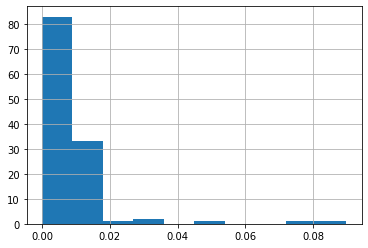

In [0]:
# Show the distibution of feature importance score of selected feature
import pandas as pd
pd.Series(sel_.estimator_.feature_importances_.ravel()).hist()

In [0]:
#print Feature Importance Score 
feat_score = pd.DataFrame({'Feature Name': X_train.columns, 'Feature Importance Score': list(sel_.estimator_.feature_importances_)}, columns=['Feature Name', 'Feature Importance Score'])
feat_score.sort_values("Feature Importance Score", axis = 0, ascending = False, 
                 inplace = True, na_position ='last') 
feat_score.head(len(selected_feat))

Feature Name  Feature Importance Score
121                 FTR                  0.089785
6                  HTAG                  0.075928
4                  FTHG                  0.044960
10                  AST                  0.034501
118               HTR_A                  0.030641
5                  HTHG                  0.025281
120               HTR_H                  0.014032
8                    AS                  0.013586
119               HTR_D                  0.012255
9                   HST                  0.011880
7                    HS                  0.011535
3                   Day                  0.011389
15                   HY                  0.011059
11                   HF                  0.010821
40                Bb1X2                  0.010763
2                 Month                  0.010581
12                   AF                  0.010387
14                   AC                  0.010298
47                 BbOU                  0.010284
13                   HC                  0.010248
1                  Year                  0.010091
16                   AY                  0.010034
55              BbAvAHH                  0.009968
34                  SJH                  0.009960
52                 BbAH                  0.009945
56              BbMxAHA                  0.009900
61                 PSCH                  0.009799
54              BbMxAHH                  0.009780
57              BbAvAHA                  0.009726
49   BbAv_more_than_2.5                  0.009590
32                  WHD                  0.009433
62                 PSCD                  0.009334
50   BbMx_less_than_2.5                  0.009285
48   BbMx_more_than_2.5                  0.009272
51   BbAv_less_than_2.5                  0.009262
35                  SJD                  0.009239
37                  VCH                  0.009120
25                  IWH                  0.009077
60                  PSA                  0.009036
36                  SJA                  0.008967
63                 PSCA                  0.008896
58                  PSH                  0.008803
27                  IWA                  0.008594
46                BbAvA                  0.008577
59                  PSD                  0.008556
30                  LBA                  0.008366
42                BbAvH                  0.008358
19                B365H                  0.008315
29                  LBD                  0.008313
28                  LBH                  0.008294
26                  IWD                  0.008235
31                  WHH                  0.008228

In [0]:
newXtrain = X_train[feature_name]

newXtrain.shape

(2681, 52)

In [0]:
newXtest = X_test[feature_name]

newXtest.shape

(1149, 52)

In [0]:
import time
#import spark_sklearn
#from spark_sklearn import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc
#import xgboost as xgb

In [0]:
def metrics_calculation(model_name,Y_true,Y_predict):
  #roc=roc_auc_score(Y_true, Y_predict)
  accuracy = accuracy_score(Y_true, Y_predict)
  precision = precision_score(Y_true, Y_predict,average=None)
  recall = recall_score(Y_true, Y_predict,average=None)
  f1 = f1_score(Y_true, Y_predict,average=None)
  metrics=  pd.DataFrame([[model_name,accuracy,precision,recall,f1]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
  return metrics

In [0]:
model_results = []
models = {}
confusion_matrices = []
time_results=[]

In [0]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
parameters = {
    'max_depth':[2,4,6,8,10],
    'min_samples_leaf':[2,4,6,8,10], 
    'min_samples_split':[2,4,6,8,10],
    'criterion': ['gini','entropy']
}

In [0]:
start = time.time()
dt_model = DecisionTreeClassifier()
#gs_dt = spark_sklearn.GridSearchCV(sc,estimator=dt,cv=5,param_grid=parameters,n_jobs=-1)
dt = GridSearchCV(estimator=dt_model,cv=5,param_grid=parameters,n_jobs=-1)
dt.fit(newXtrain,y_train)
finish = time.time()
print('Time required to do Parallel Grid Search CV: {} seconds'.format(finish - start))
time_results.append(("DecisionTreeClassifier",finish - start))
time_results

Time required to do Parallel Grid Search CV: 40.74833154678345 seconds


[('DecisionTreeClassifier', 40.74833154678345)]

In [0]:
# get best parameters
print(dt.best_params_)
print(dt.best_score_)
print(dt.best_estimator_)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 4}
0.7482281330776287
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [0]:
models['dt'] = dt
predYtest = dt.predict(newXtest)
model_results.append(metrics_calculation('Decision Tree',y_test,predYtest))
model_results

[           Model  ...                                           F1 Score
 0  Decision Tree  ...  [0.8787878787878788, 0.7873090481786132, 0.686...
 
 [1 rows x 5 columns]]

In [0]:
# confusion matrix
print('Decision Tree: ', confusion_matrix(y_test,predYtest))
confusion_matrices.append(("DecisionTreeClassifier",confusion_matrix(y_test,predYtest)))
confusion_matrices

Decision Tree:  [[348  45   0   0   0   0   0   0   0]
 [ 48 335  13   0   0   0   0   0   0]
 [  3  59 141  18   0   0   0   0   0]
 [  0  16  27  40   7   1   1   0   0]
 [  0   0   8  13  10   1   1   0   0]
 [  0   0   1   7   1   1   0   0   0]
 [  0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0]
 [  0   0   0   1   1   0   0   0   0]]


[('DecisionTreeClassifier',
  array([[348,  45,   0,   0,   0,   0,   0,   0,   0],
         [ 48, 335,  13,   0,   0,   0,   0,   0,   0],
         [  3,  59, 141,  18,   0,   0,   0,   0,   0],
         [  0,  16,  27,  40,   7,   1,   1,   0,   0],
         [  0,   0,   8,  13,  10,   1,   1,   0,   0],
         [  0,   0,   1,   7,   1,   1,   0,   0,   0],
         [  0,   0,   0,   1,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   1,   0,   0,   0],
         [  0,   0,   0,   1,   1,   0,   0,   0,   0]]))]

In [0]:
# Logistic Regression
parameters = {
  'C': [0.001, 0.01, 0.1, 1, 10], 
  'class_weight': [None, 'balanced'], 
  'penalty': ['l1', 'l2']
}

In [0]:
from sklearn.linear_model import LogisticRegression
start = time.time()
lr_model = LogisticRegression()
#gs_lr = spark_sklearn.GridSearchCV(sc,estimator=lr,param_grid = parameters,cv=5,n_jobs=-1)
lr = GridSearchCV(estimator=lr_model,param_grid = parameters,cv=5,n_jobs=-1)
lr.fit(newXtrain,y_train)
finish = time.time()
print('Time required to do Parallel Grid Search CV: {} seconds'.format(finish - start))
time_results.append(("LogisticRegression",finish - start))
time_results

Time required to do Parallel Grid Search CV: 7.951429843902588 seconds


[('DecisionTreeClassifier', 40.74833154678345),
 ('LogisticRegression', 7.951429843902588)]

In [0]:
# get best parameters
print(lr.best_params_)
print(lr.best_score_)
print(lr.best_estimator_)

{'C': 0.1, 'class_weight': None, 'penalty': 'l2'}
0.42334903693821396
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [0]:
models['lr'] = lr
predYtest = lr.predict(newXtest)
model_results.append(metrics_calculation('Logistic Regression',y_test,predYtest))
model_results

[           Model  ...                                           F1 Score
 0  Decision Tree  ...  [0.8787878787878788, 0.7873090481786132, 0.686...
 
 [1 rows x 5 columns],
                  Model  ...                                           F1 Score
 0  Logistic Regression  ...  [0.5783718104495748, 0.47295864262990456, 0.22...
 
 [1 rows x 5 columns]]

In [0]:
# Confusion Matrix
print('Logistic Regression: ', confusion_matrix(y_test,predYtest))
confusion_matrices.append(("LogisticRegression",confusion_matrix(y_test,predYtest)))
confusion_matrices

Logistic Regression:  [[238 134  15   6   0   0   0   0   0]
 [146 223  22   5   0   0   0   0   0]
 [ 41 129  40  10   1   0   0   0   0]
 [  4  51  30   6   1   0   0   0   0]
 [  1   9  16   7   0   0   0   0   0]
 [  0   1   8   1   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   0]
 [  0   0   0   2   0   0   0   0   0]]


[('DecisionTreeClassifier',
  array([[348,  45,   0,   0,   0,   0,   0,   0,   0],
         [ 48, 335,  13,   0,   0,   0,   0,   0,   0],
         [  3,  59, 141,  18,   0,   0,   0,   0,   0],
         [  0,  16,  27,  40,   7,   1,   1,   0,   0],
         [  0,   0,   8,  13,  10,   1,   1,   0,   0],
         [  0,   0,   1,   7,   1,   1,   0,   0,   0],
         [  0,   0,   0,   1,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   1,   0,   0,   0],
         [  0,   0,   0,   1,   1,   0,   0,   0,   0]])),
 ('LogisticRegression', array([[238, 134,  15,   6,   0,   0,   0,   0,   0],
         [146, 223,  22,   5,   0,   0,   0,   0,   0],
         [ 41, 129,  40,  10,   1,   0,   0,   0,   0],
         [  4,  51,  30,   6,   1,   0,   0,   0,   0],
         [  1,   9,  16,   7,   0,   0,   0,   0,   0],
         [  0,   1,   8,   1,   0,   0,   0,   0,   0],
         [  0,   0,   1,   0,   0,   0,   0,   0,   0],
         [  0,   0,   1,   0,   0,   0,   0,   0,  

In [0]:
#XGBoost
#https://towardsdatascience.com/fine-tuning-xgboost-in-python-like-a-boss-b4543ed8b1e
#https://www.datacamp.com/community/tutorials/xgboost-in-python

parameters = [
    {'objective': ['reg:logistic'],
     'learning_rate': [0.01, 0.05, 0.1],
     'n_estimators': [10, 20, 40, 80],
     'max_depth': [3,5,10],
     'gamma': [1,3,5,10],
     'colsample_bytree': [0.3, 0.5, 0.8]},
]

In [0]:
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
#from sklearn.cross_validation import *
from sklearn.model_selection import GridSearchCV

start = time.time()
xgb_model = xgb.XGBClassifier()
#gs_xgbc = spark_sklearn.GridSearchCV(sc,estimator=xgbc,param_grid = parameters,cv=5,n_jobs=-1)
xgbc = GridSearchCV(estimator=xgb_model,param_grid = parameters,cv=5,n_jobs=-1)
xgbc.fit(newXtrain,y_train)
finish = time.time()
print('Time required to do Parallel Grid Search CV: {} seconds'.format(finish - start))
time_results.append(("XGBoost Classifier",finish - start))
time_results

Time required to do Parallel Grid Search CV: 1756.0348994731903 seconds


[('DecisionTreeClassifier', 40.74833154678345),
 ('LogisticRegression', 7.951429843902588),
 ('XGBoost Classifier', 1756.0348994731903)]

In [0]:
# get best parameters
print(xgbc.best_params_)
print(xgbc.best_score_)
print(xgbc.best_estimator_)

{'colsample_bytree': 0.8, 'gamma': 10, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 40, 'objective': 'reg:logistic'}
0.7571819672586787
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=10,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=40, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [0]:
models['xgbc'] = xgbc
predYtest = xgbc.predict(newXtest)
model_results.append(metrics_calculation('XGBC',y_test,predYtest))
model_results

[           Model  ...                                           F1 Score
 0  Decision Tree  ...  [0.8787878787878788, 0.7873090481786132, 0.686...
 
 [1 rows x 5 columns],
                  Model  ...                                           F1 Score
 0  Logistic Regression  ...  [0.5783718104495748, 0.47295864262990456, 0.22...
 
 [1 rows x 5 columns],
   Model  ...                                           F1 Score
 0  XGBC  ...  [0.8694690265486726, 0.762532981530343, 0.7064...
 
 [1 rows x 5 columns]]

In [0]:
# Confusion Matrix
print('XGBC: ', confusion_matrix(y_test,predYtest))
confusion_matrices.append(("XGBoost Classifier",confusion_matrix(y_test,predYtest)))
confusion_matrices

XGBC:  [[393   0   0   0   0   0   0   0   0]
 [104 289   3   0   0   0   0   0   0]
 [ 10  57 154   0   0   0   0   0   0]
 [  4  14  36  38   0   0   0   0   0]
 [  0   2  16  15   0   0   0   0   0]
 [  0   0   5   5   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0]
 [  0   0   1   1   0   0   0   0   0]]


[('DecisionTreeClassifier',
  array([[348,  45,   0,   0,   0,   0,   0,   0,   0],
         [ 48, 335,  13,   0,   0,   0,   0,   0,   0],
         [  3,  59, 141,  18,   0,   0,   0,   0,   0],
         [  0,  16,  27,  40,   7,   1,   1,   0,   0],
         [  0,   0,   8,  13,  10,   1,   1,   0,   0],
         [  0,   0,   1,   7,   1,   1,   0,   0,   0],
         [  0,   0,   0,   1,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   1,   0,   0,   0],
         [  0,   0,   0,   1,   1,   0,   0,   0,   0]])),
 ('LogisticRegression', array([[238, 134,  15,   6,   0,   0,   0,   0,   0],
         [146, 223,  22,   5,   0,   0,   0,   0,   0],
         [ 41, 129,  40,  10,   1,   0,   0,   0,   0],
         [  4,  51,  30,   6,   1,   0,   0,   0,   0],
         [  1,   9,  16,   7,   0,   0,   0,   0,   0],
         [  0,   1,   8,   1,   0,   0,   0,   0,   0],
         [  0,   0,   1,   0,   0,   0,   0,   0,   0],
         [  0,   0,   1,   0,   0,   0,   0,   0,  

In [0]:
# combine dataframes, each dataframe store the metrics of each classifier

df1 = pd.DataFrame(model_results[0])
df2 = pd.DataFrame(model_results[1])
df3 = pd.DataFrame(model_results[2])

frames = [df1, df2, df3]
result = pd.concat(frames)
result

Model  ...                                           F1 Score
0        Decision Tree  ...  [0.8787878787878788, 0.7873090481786132, 0.686...
0  Logistic Regression  ...  [0.5783718104495748, 0.47295864262990456, 0.22...
0                 XGBC  ...  [0.8694690265486726, 0.762532981530343, 0.7064...

[3 rows x 5 columns]

In [0]:
# store training acc 
tr_score = []
tr_score.append(dt.best_score_)
tr_score.append(lr.best_score_)
tr_score.append(xgbc.best_score_)

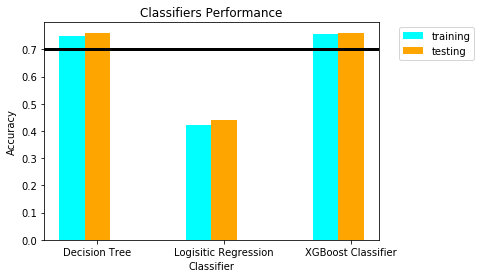

In [0]:
# plot accuracy bar chart

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = [ 'Decision Tree',  'Logisitic Regression', 'XGBoost Classifier']
accuracy = result['Accuracy']
train_acc = tr_score

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, train_acc, width, color = 'aqua', label = 'training')
rects2 = ax.bar(x + width , accuracy, width, color = 'orange', label = 'testing')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Classifier')
ax.set_xticks(x + width)
ax.set_xticklabels(labels)
ax.set_title('Classifiers Performance')
plt.legend(bbox_to_anchor=(1.3,1))

plt.axhline(y=0.7,linewidth=3, color='black')
plt.show()

In [0]:
#visualisation of Decision Tree

In [0]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dt.best_estimator_, out_file=None,
                          feature_names=newXtrain.columns.values,
                          class_names=['zero','one','two', 'three', 'four', 'five'
                          'six','seven','eight or above',],
                          filled=True, rounded=True,
                          special_characters=True)

graph = graphviz.Source(dot_data)

In [0]:
graph.render('/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/graph/Phase II/DT_FS=tree_FTAG',view=True)

'/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/graph/Phase II/DT_FS=tree_FTAG.pdf'

In [0]:
#visualisation of Logistic Regression

In [0]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html

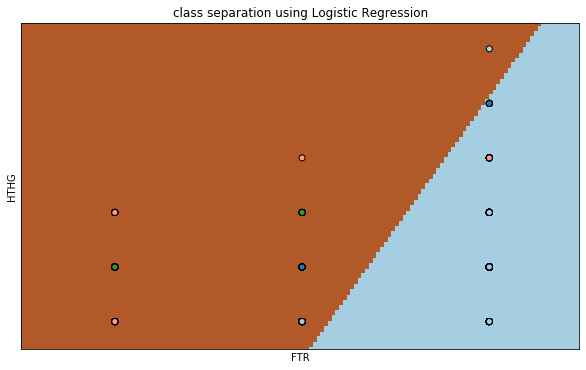

In [0]:
import seaborn as sb
import matplotlib.pyplot as plt
# select FTHG and FTAG, two features with the highest feature importance score
X = newXtest[['FTR','HTAG']]
Y = y_test
# using the best parameters
logreg = LogisticRegression(C=0.1, class_weight = None , penalty = 'l2')
logreg.fit(X,Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10,6 ))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('FTR')
plt.ylabel('HTHG')
plt.title('class separation using Logistic Regression')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

#plt.figure(figsize=(25,10))
#plt.savefig('/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/graph/Phase II/LR_FS=tree_FTR.jpeg')
#plt.show()

fig = plt.gcf()
plt.show()
fig.savefig('/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/graph/Phase II/LR_FS=tree_FTAG1.jpeg',dpi=500,bbox_inches = 'tight')

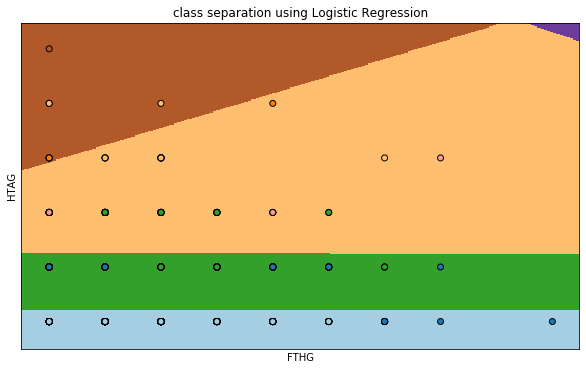

In [0]:
import seaborn as sb
import matplotlib.pyplot as plt
# select FTHG and FTAG, two features with the highest feature importance score
X = newXtest[['FTHG','HTAG']]
Y = y_test
# using the best parameters
logreg = LogisticRegression(C=0.1, class_weight = None , penalty = 'l2')
logreg.fit(X,Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10,6 ))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('FTHG')
plt.ylabel('HTAG')
plt.title('class separation using Logistic Regression')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

#plt.figure(figsize=(25,10))
#plt.savefig('/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/graph/Phase II/LR_FS=tree_FTR.jpeg')
#plt.show()

fig = plt.gcf()
plt.show()
fig.savefig('/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/graph/Phase II/LR_FS=tree_FTAG2.jpeg',dpi=500,bbox_inches = 'tight')

In [0]:
# visualise XGBC

In [0]:
# https://machinelearningmastery.com/visualize-gradient-boosting-decision-trees-xgboost-python/ 

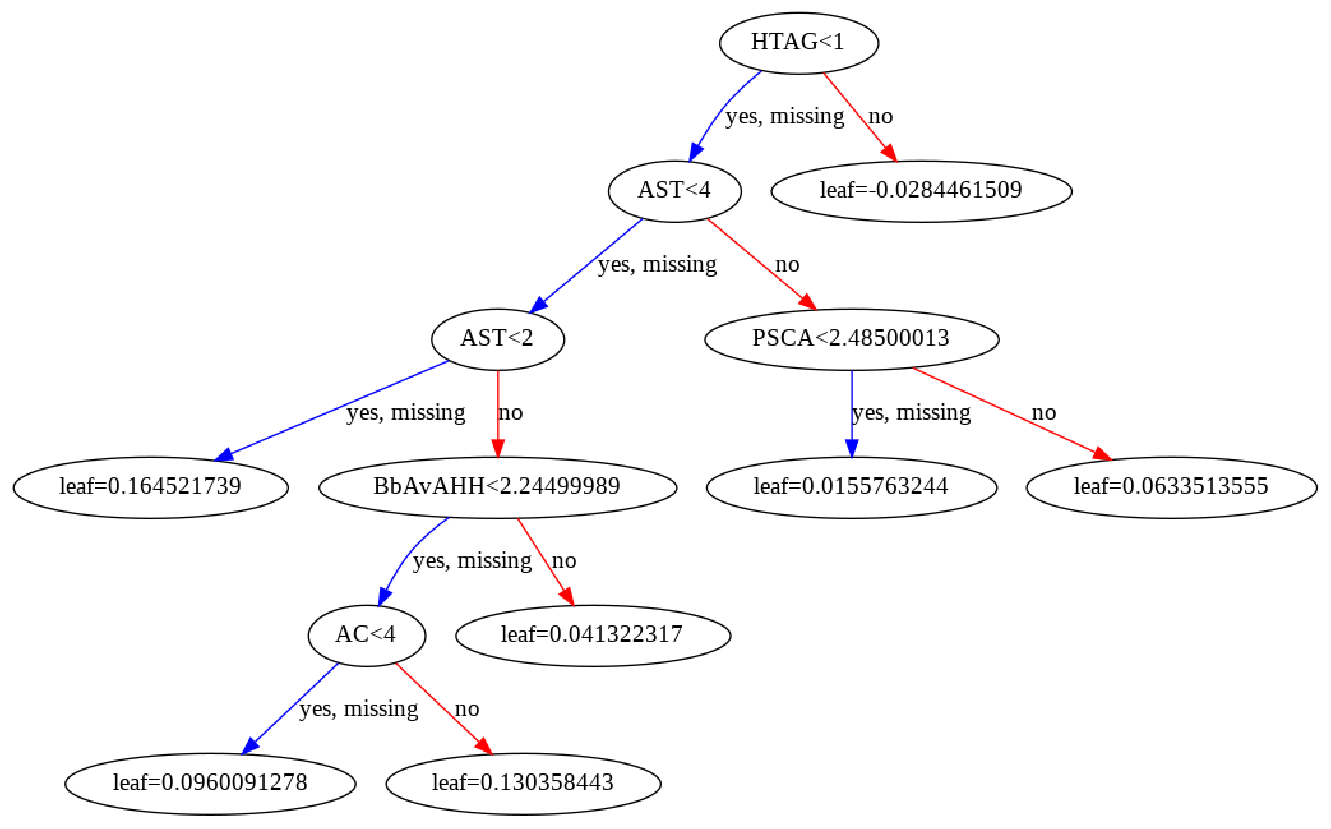

In [0]:
# plot single tree
from xgboost import plot_tree
plot_tree(xgbc.best_estimator_)

fig2 = plt.gcf()
fig2.set_size_inches (25,15)
#plt.show()
fig2.savefig('/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/graph/Phase II/XGB_FS=tree_FTAG_2.jpeg',dpi=500,bbox_inches = 'tight')


In [0]:
# plot feature_importance
fig,ax = plt.subplots(figsize=(15,15))
plot_importance(xgbc.best_estimator_,
                height=0.5,
                ax=ax)
plt.show()
plt.savefig('/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/graph/Phase II/XGB_FS=tree_FTAG_FI.jpeg',dpi=500,bbox_inches = 'tight')

In [0]:
# Save Model
from sklearn.externals import joblib 

dt = joblib.dump(dt,'/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/Model/Classifiers/FTAG_FS=tree_DT' )
lr = joblib.dump(lr,'/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/Model/Classifiers/FTAG_FS=tree_LR' )
xgb = joblib.dump(xgbc,'/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/Model/Classifiers/FTAG_FS=tree_XGB' )

In [0]:
dt, lr, xgb

(['/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/Model/Classifiers/FTAG_FS=tree_DT'],
 ['/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/Model/Classifiers/FTAG_FS=tree_LR'],
 ['/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/Model/Classifiers/FTAG_FS=tree_XGB'])